#### load dependencies

In [1]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout,Dense,Flatten
from keras.models import Sequential
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import os
from keras.datasets import imdb
%matplotlib inline

C:\Users\Munna chowhan\Anaconda3\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### set hyperparameters

In [2]:
output_dir = "model_output/dense/"

epochs = 8
batch_size = 128

#embedding layer:
n_dims = 64
max_review_length = 100
# skip top 50 words to skip common words(stopwords are not removed so have to do this)
n_words_to_skip = 50
n_unique_words = 5000
#while padding if the review is < 100 words pad it at the beginning of the review.
#while truncating if the review is > 100 cut the review at the beginning
pad_type = trunc_type = "pre"

#dense_layer:
n_dense = 64
dropout = 0.5

In [3]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=n_unique_words,skip_top=n_words_to_skip)

In [4]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNKNOWN"] = 2

In [5]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [6]:
index_word = {v:k for k, v in word_index.items()}

In [7]:
" ".join(index_word[id] for id in x_train[0])

"UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOWN brilliant casting location scenery story direction everyone's really suited UNKNOWN part UNKNOWN played UNKNOWN UNKNOWN could UNKNOWN imagine being there robert UNKNOWN UNKNOWN UNKNOWN amazing actor UNKNOWN now UNKNOWN same being director UNKNOWN father came UNKNOWN UNKNOWN same scottish island UNKNOWN myself UNKNOWN UNKNOWN loved UNKNOWN fact there UNKNOWN UNKNOWN real connection UNKNOWN UNKNOWN UNKNOWN UNKNOWN witty remarks throughout UNKNOWN UNKNOWN were great UNKNOWN UNKNOWN UNKNOWN brilliant UNKNOWN much UNKNOWN UNKNOWN bought UNKNOWN UNKNOWN UNKNOWN soon UNKNOWN UNKNOWN UNKNOWN released UNKNOWN UNKNOWN UNKNOWN would recommend UNKNOWN UNKNOWN everyone UNKNOWN watch UNKNOWN UNKNOWN fly UNKNOWN UNKNOWN amazing really cried UNKNOWN UNKNOWN end UNKNOWN UNKNOWN UNKNOWN sad UNKNOWN UNKNOWN know what UNKNOWN say UNKNOWN UNKNOWN cry UNKNOWN UNKNOWN UNKNOWN UNKNOWN must UNKNOWN been good UNKNOWN UNKNOWN definitely UNKNOWN also UNKNOWN UNKNOWN UNKNOW

### preprocessing data

In [8]:
x_train = pad_sequences(x_train,maxlen=max_review_length,padding=pad_type,truncating=trunc_type,value=0)
x_test = pad_sequences(x_test,maxlen=max_review_length,padding=pad_type,truncating=trunc_type,value=0)

### model architecture

In [9]:
model = Sequential()

In [10]:
model.add(Embedding(n_unique_words,n_dims,input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense,activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(1, activation="sigmoid"))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
modelcheckpoint  = ModelCheckpoint(filepath=output_dir +"weights.{epoch:02d}.hdf5")

In [14]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [15]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),verbose=1, callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 8s 323us/step - loss: 0.5561 - acc: 0.6904 - val_loss: 0.3583 - val_acc: 0.8411
Epoch 2/8
25000/25000 [==============================] - 7s 265us/step - loss: 0.2817 - acc: 0.8872 - val_loss: 0.3476 - val_acc: 0.8455
Epoch 3/8
25000/25000 [==============================] - 6s 255us/step - loss: 0.1187 - acc: 0.9641 - val_loss: 0.4189 - val_acc: 0.8342
Epoch 4/8
25000/25000 [==============================] - 7s 292us/step - loss: 0.0261 - acc: 0.9959 - val_loss: 0.5184 - val_acc: 0.8327
Epoch 5/8
25000/25000 [==============================] - 7s 299us/step - loss: 0.0065 - acc: 0.9996 - val_loss: 0.5999 - val_acc: 0.8335
Epoch 6/8
25000/25000 [==============================] - 7s 275us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.6638 - val_acc: 0.8336
Epoch 7/8
25000/25000 [==============================] - 7s 280us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.7059 - val_acc

In [16]:
model.load_weights(filepath=output_dir+"/weights.01.hdf5")

In [17]:
y_pred = model.predict_proba(x_test)

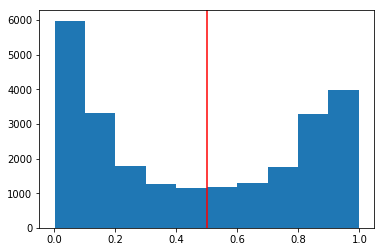

In [18]:
plt.hist(y_pred)
_ = plt.axvline(x = 0.5, color="red")

In [19]:
auc = roc_auc_score(y_test,y_pred)*100.0

In [20]:
auc

92.58491936

In [21]:
predicted_sentiment = []
for i in y_pred:
    predicted_sentiment.append(i[0])

In [22]:
df = pd.DataFrame(list(zip(predicted_sentiment,y_test)),columns=["predicted","real"])

In [23]:
df.head()

,predicted,real
0,0.260561,0
1,0.891781,1
2,0.411403,1
3,0.255746,0
4,0.964376,1


### load whole dataset

In [24]:

(all_x_train,all_y_train),(all_x_test,all_y_test) = imdb.load_data()

## read whole review

In [25]:
" ".join([index_word[i] for i in all_x_test[4]])

"START like some other people wrote i'm a die hard mario fan and i loved this game br br this game starts slightly boring but trust me it's worth it as soon as you start your hooked the levels are fun and exiting they will hook you 'till your mind turns to mush i'm not kidding this game is also orchestrated and is beautifully done br br to keep this spoiler free i have to keep my mouth shut about details but please try this game it'll be worth it br br story 9 9 action 10 1 it's that good hardness 10 attention grabber 10 average 10"